## Decision Tree with scikit-learn

In [1]:
import pandas as pd

### Load dataset

In [2]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

In [3]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [4]:
train_id = train_df['PassengerId'].values
test_id = test_df['PassengerId'].values

In [8]:
all_df = train_df.append(test_df).set_index('PassengerId')
all_df.head()

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_86035/2504507403.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = train_df.append(test_df).set_index('PassengerId')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing

In [10]:
all_df["Sex"] = all_df["Sex"].replace({'male':0, 'female':1})
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
all_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [14]:
# null값 처리 - Age
all_df['Age'].fillna(all_df.groupby('Pclass')['Age'].transform("mean"), inplace = True)

In [15]:
all_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [18]:
all_df['cabin_count'] = all_df['Cabin'].map(lambda x : len(x.split()) if type(x) == str else 0)
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
all_df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [20]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

In [21]:
all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [24]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

In [25]:
all_df[all_df["social_status"] == "0"]["Name"]

PassengerId
31                               Uruchurtu, Don. Manuel E
370                         Aubart, Mme. Leontine Pauline
450                        Peuchen, Major. Arthur Godfrey
537                     Butt, Major. Archibald Willingham
642                                  Sagesser, Mlle. Emma
746                          Crosby, Capt. Edward Gifford
760     Rothes, the Countess. of (Lucy Noel Martha Dye...
823                       Reuchlin, Jonkheer. John George
1306                         Oliva y Ocana, Dona. Fermina
Name: Name, dtype: object

In [28]:
all_df.iloc[train_id-1].isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
cabin_count        0
social_status      0
dtype: int64

In [30]:
all_df[all_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


### Embarked 2개 빈 거 Drop

In [33]:
all_df = all_df.drop([62, 830])

In [35]:
all_df.isnull().sum()

Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            0
cabin_count         0
social_status       0
dtype: int64

In [36]:
import numpy as np

train_id = np.delete(train_id, [62 -1 , 830 - 1])

In [37]:
all_df.iloc[:len(train_id)].isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
cabin_count        0
social_status      0
dtype: int64

In [40]:
all_df[all_df["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [41]:
all_df.groupby(['Pclass', 'Sex'])['Fare'].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [42]:
all_df.loc[all_df['Fare'].isnull(), 'Fare'] = 12.415462

In [43]:
all_df.isnull().sum()

Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
cabin_count         0
social_status       0
dtype: int64

In [44]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [45]:
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,99
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,99
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs,C
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr,99


In [46]:
del all_df['Cabin']
del all_df['Name']
del all_df['Ticket']

In [47]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,S,0,Mr,99
2,1.0,1,1,38.0,1,0,71.2833,C,1,Mrs,C
3,1.0,3,1,26.0,0,0,7.9250,S,0,Miss,99
4,1.0,1,1,35.0,1,0,53.1000,S,1,Mrs,C
5,0.0,3,0,35.0,0,0,8.0500,S,0,Mr,99


In [48]:
all_df.loc[train_id]["Survived"].isnull().sum()

0

In [51]:
y = all_df.loc[train_id, 'Survived'].values
y[:100]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [52]:
len(y), len(train_id)

(889, 889)

In [53]:
del all_df['Survived']

### One-hot Encoding

In [54]:
X_df = pd.get_dummies(all_df)
X_df

,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_count,Embarked_C,Embarked_Q,Embarked_S,...,social_status_Rev,cabin_type_99,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,38.000000,1,0,71.2833,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1,26.000000,0,0,7.9250,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.000000,1,0,53.1000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,3,0,35.000000,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,24.816367,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1306,1,1,39.000000,0,0,108.9000,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1307,3,0,38.500000,0,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [56]:
X = X_df.values
X

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  1.        , 26.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 38.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , 24.81636727, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , 24.81636727, ...,  0.        ,
         0.        ,  0.        ]])

In [57]:
X.shape

(1307, 27)

In [58]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [59]:
X

array([[1.        , 0.        , 0.27345609, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.473882  , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32356257, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.48014531, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.30873565, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.30873565, ..., 0.        , 0.        ,
        0.        ]])

In [60]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

In [63]:
len(X_train), len(y)

(889, 889)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

algorithms = [LogisticRegression(), DecisionTreeClassifier()]

In [66]:
c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [67]:
params

[[{'solver': ['saga'],
   'penalty': ['l1'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]},
  {'solver': ['liblinear'],
   'penalty': ['l2'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}],
 {'criterion': ['gini', 'entropy'],
  'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithms,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=4)
    print(gs_estimator)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l1'], 'solver': ['saga']},
                         {'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l2'], 'solver': ['liblinear']}],
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [70]:
estimator_results[0].best_score_

0.8268075922046594

In [72]:
# Decision Tree가 조금 더 잘 나왔다
estimator_results[1].best_score_

0.8346918047356059

In [73]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [74]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=100)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
135,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,5.0
136,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,6.0
139,DecisionTreeClassifier,0.834679,None,None,NaN,entropy,4.0,9.0
137,DecisionTreeClassifier,0.833556,None,None,NaN,entropy,4.0,7.0
138,DecisionTreeClassifier,0.833556,None,None,NaN,entropy,4.0,8.0
...,...,...,...,...,...,...,...,...
142,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,3.0
148,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,9.0
140,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,1.0
122,DecisionTreeClassifier,0.809947,None,None,NaN,entropy,5.0,1.0


In [75]:
estimator_results[1].best_estimator_.feature_importances_

array([0.13273669, 0.06209254, 0.09444317, 0.        , 0.        ,
       0.18738059, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5099484 , 0.        , 0.        , 0.01339862, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [77]:
# social_status_Mr가 0.5099484로 가장 중요했음
X_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [81]:
estimator_results[0].best_estimator_.coef_

array([[-1.73402061,  2.24871443, -2.19185205, -3.65078956, -2.41066606,
         1.27767702, -0.45084802,  0.50596033,  0.3479653 ,  0.07057548,
        -0.60628328,  0.3376824 , -0.06522338,  2.50565411,  0.07097908,
        -0.57552065,  0.75801619, -1.50080337, -0.41747764,  0.16045471,
         0.32518844, -0.10809999,  0.84396811,  1.13125029,  0.53153586,
        -0.733188  , -0.80913066]])

#### pydot를 사용하여 Decision Tree를 출력할 수 있음

In [82]:
best_tree = estimator_results[1].best_estimator_
column_names=  pd.get_dummies(all_df).columns

In [83]:
column_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [85]:
%pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=d9189cd257805bff2016e6e18d0c0b95402be851b2a984c1a746a77159c46086
  Stored in directory: /Users/kwon-yong-geun/Library/Caches/pip/wheels/fb/b6/e0/3c56ce12496fc2eebbe224c7b0fabc502cde0eb1f449c50239
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


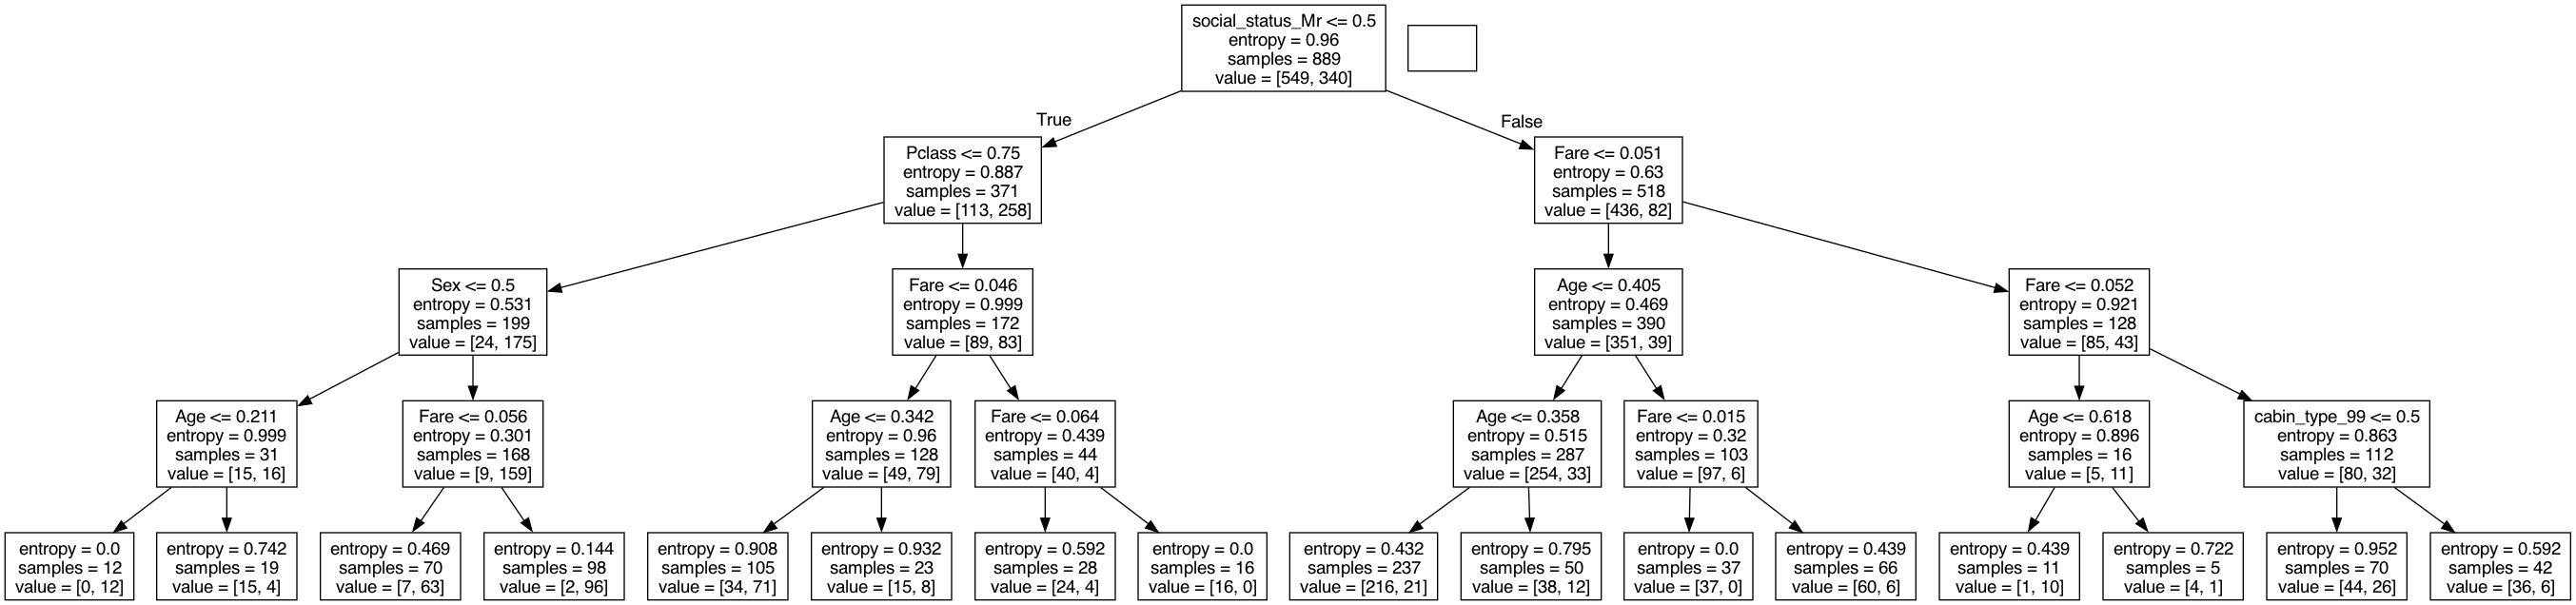

In [88]:
import pydotplus
from six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(best_tree, out_file=dot_data, feature_names=column_names) 

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
from IPython.core.display import Image 
Image(filename='titanic.png')

In [89]:
len(test_id), len(best_tree.predict(X_test))

(418, 418)

In [90]:
test_id.dtype="int"

In [91]:
clf = estimator_results[0].best_estimator_

result = np.concatenate( (test_id.reshape(-1,1),
                 clf.predict(X_test).reshape(-1,1)  ) , axis=1)
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"],dtype=int)
df_submssion.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
df_submssion.to_csv("submission_result.csv",index=False)